In [1]:
import os
!pip install soyspacing
!pip install sentencepiece
!pip install bert-tensorflow
!pip install soynlp
!git clone https://github.com/ratsgo/embedding.git
!pip install konlpy
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

     |████████████████████████████████| 1.0MB 6.7MB/s 
     |████████████████████████████████| 71kB 3.6MB/s 
     |████████████████████████████████| 419kB 5.6MB/s 
Cloning into 'embedding'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 1498 (delta 53), reused 59 (delta 29), pack-reused 1407
Receiving objects: 100% (1498/1498), 394.92 KiB | 1.17 MiB/s, done.
Resolving deltas: 100% (984/984), done.
     |████████████████████████████████| 19.4MB 422kB/s 
     |████████████████████████████████| 2.7MB 50.6MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.8).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Installing automake (A depen

In [2]:
# kakao 형태소 분석기 
os.chdir('/content')
!git clone https://github.com/kakao/khaiii.git
os.chdir('/content/khaiii')
os.mkdir('/content/khaiii/build')
os.chdir('/content/khaiii/build')
!cmake ..
!make all
!make resource
!make package_python
os.chdir('package_python')
!pip install  . 
!pip install kss

Cloning into 'khaiii'...
remote: Enumerating objects: 877, done.
remote: Total 877 (delta 0), reused 0 (delta 0), pack-reused 877
Receiving objects: 100% (877/877), 30.21 MiB | 19.11 MiB/s, done.
Resolving deltas: 100% (358/358), done.
-- [hunter] Initializing Hunter workspace (70287b1ffa810ee4e952052a9adff9b4856d0d54)
-- [hunter]   https://github.com/ruslo/hunter/archive/v0.23.34.tar.gz
-- [hunter]   -> /root/.hunter/_Base/Download/Hunter/0.23.34/70287b1
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX comp

In [0]:
import os
os._exit(00)

In [1]:
import khaiii
from konlpy.tag import Mecab

m = Mecab()
api = khaiii.KhaiiiApi()

print('mecab checker :', m.morphs('텍스트 테스트 라인 입니다'), '\n')

print('khaiii checker')
for word in api.analyze('텍스트 테스트 라인 입니다.'):
  print(word)

mecab checker : ['텍스트', '테스트', '라인', '입니다'] 

khaiii checker
텍스트	텍스트/NNG
테스트	테스트/NNG
라인	라인/NNG
입니다.	이/VCP + ㅂ니다/EF + ./SF


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import khaiii
from konlpy.tag import Mecab
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer

In [0]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/0.Projects/Text Similarity/KCC /train_data.xlsx', encode='utf-8')

In [6]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 7 columns):
name          45730 non-null object
size          42247 non-null object
unit          39576 non-null object
name.1        45730 non-null object
size.1        35201 non-null object
unit.1        45721 non-null object
is_similar    45730 non-null int64
dtypes: int64(1), object(6)
memory usage: 2.4+ MB


In [7]:
df.tail()

,name,size,unit,name.1,size.1,unit.1,is_similar
45725,어스앵커공 천공,"토사, 대규모(실적)",NaN,콘크리트타설(철근),레미콘,m2,0
45726,어스앵커공 천공,"토사, 대규모(실적)",NaN,철근콘크리트타설/펌프카(표준시장),슬럼프 15cm(100m3이상),m2,0
45727,어스앵커공 천공,"토사, 대규모(실적)",NaN,콘크리트타설(철근),레미콘,m2,0
45728,어스앵커공 천공,"토사, 대규모(실적)",NaN,유공관,THP Φ100㎜,M,0
45729,어스앵커공 천공,"토사, 대규모(실적)",NaN,웨더실란트 실란트충진,NaN,m,0


In [0]:
# fill na values

df['size'].fillna('', inplace=True)
df['size.1'].fillna('', inplace=True)
df['unit'].fillna('', inplace=True)
df['unit.1'].fillna('', inplace=True)
df['is_similar'].fillna(0, inplace=True)

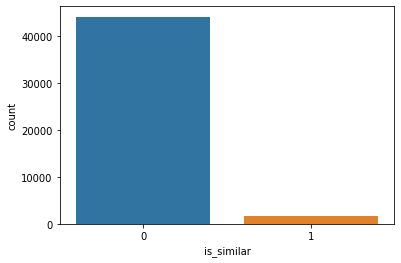

In [9]:
import seaborn as sns

sns.countplot('is_similar', data=df)

In [0]:
df['is_similar'].value_counts()

0    44110
1     1620
Name: is_similar, dtype: int64

In [0]:
df = df.astype('str')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 7 columns):
name          45730 non-null object
size          45730 non-null object
unit          45730 non-null object
name.1        45730 non-null object
size.1        45730 non-null object
unit.1        45730 non-null object
is_similar    45730 non-null object
dtypes: object(7)
memory usage: 2.4+ MB


In [0]:
df.isna().sum()

name          0
size          0
unit          0
name.1        0
size.1        0
unit.1        0
is_similar    0
dtype: int64

In [0]:
df['sentence_1'] = df['name'] + ', ' + df['size'] + ', ' + df['unit']
df['sentence_2'] = df['name.1'] + ', ' + df['size.1'] + ', ' + df['unit.1']

In [0]:
df.head()

,name,size,unit,name.1,size.1,unit.1,is_similar,sentence_1,sentence_2
0,가설사무실,"발주처,감리사무실,현장사무실 ,화장실 등",식,가설사무실,"발주처,감리사무실,현장사무실 ,화장실 등",식,1,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식"
1,가설사무실,"발주처,감리사무실,현장사무실 ,화장실 등",식,가설경비실 (2.4*2.4 기준),,월,1,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","가설경비실 (2.4*2.4 기준), , 월"
2,가설사무실,"발주처,감리사무실,현장사무실 ,화장실 등",식,이동식화장실(FRP),,EA,1,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","이동식화장실(FRP), , EA"
3,가설사무실,"발주처,감리사무실,현장사무실 ,화장실 등",식,EGI펜스,,M2,0,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","EGI펜스, , M2"
4,가설사무실,"발주처,감리사무실,현장사무실 ,화장실 등",식,스틸방음벽(자주식),,M2,0,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","스틸방음벽(자주식), , M2"


In [0]:
train = df[['sentence_1', 'sentence_2', 'is_similar']]

In [0]:
train.head()

,sentence_1,sentence_2,is_similar
0,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식",1
1,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","가설경비실 (2.4*2.4 기준), , 월",1
2,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","이동식화장실(FRP), , EA",1
3,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","EGI펜스, , M2",0
4,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","스틸방음벽(자주식), , M2",0


In [0]:
# create courpus

sent_1 = df['sentence_1']
sent_2 = df['sentence_2']

sent_join = pd.concat([sent_1, sent_2])

In [0]:
sent_join.value_counts()

H-PILE 박기 천공, 토사, 대규모(실적), M                      2239
어스앵커공 천공, 토사, 대규모(실적),                            2239
AW2a, 1.160 x 12.390 = 8.456, EA                  1638
AW1c, 1.160 x 7.290 = 8.456, EA                   1622
AW2, 1.160 x 12.390 = 8.456, EA                   1622
                                                  ... 
바탕만들기+수성페인트(롤러칠), 내부, 2회, 석고보드면(줄퍼티), 친환경페인트,        2
임대료 ,  저속싱글(1.0ton) , 월                              2
임대료 ,  저속싱글(1.0ton) , 월                              1
실런트 수축줄눈, 20mm * 25mm, m                             1
유공관 설치, D100, M                                      1
Length: 841, dtype: int64

In [0]:
sent_join.apply(lambda x: x.strip())

0                 가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식
1                 가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식
2                 가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식
3                 가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식
4                 가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식
                           ...                    
45725                          콘크리트타설(철근), 레미콘, m2
45726    철근콘크리트타설/펌프카(표준시장), 슬럼프 15cm(100m3이상), m2
45727                          콘크리트타설(철근), 레미콘, m2
45728                            유공관, THP Φ100㎜, M
45729                             웨더실란트 실란트충진, , m
Length: 91460, dtype: object

In [0]:
sent_join.reset_index(drop=True, inplace=True)

In [0]:
text_join = pd.DataFrame(sent_join)

In [0]:
text_join

,0
0,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식"
1,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식"
2,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식"
3,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식"
4,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식"
...,...
91455,"콘크리트타설(철근), 레미콘, m2"
91456,"철근콘크리트타설/펌프카(표준시장), 슬럼프 15cm(100m3이상), m2"
91457,"콘크리트타설(철근), 레미콘, m2"
91458,"유공관, THP Φ100㎜, M"


In [0]:
mecab = Mecab()

In [0]:
mecab.morphs('가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식')

['가설',
 '사무실',
 ',',
 '발주',
 '처',
 ',',
 '감리사',
 '무실',
 ',',
 '현장',
 '사무실',
 ',',
 '화장실',
 '등',
 ',',
 '식']

In [0]:
courpus = text_join[0].to_list()

## Mecab Morph

In [0]:
import re
remove_comma = re.compile(',')
def rm_comma(x):
  return re.sub(remove_comma, ' ', x)

def mecab_morph(x):
  x = str(x)
  x = rm_comma(x)
  x = x.strip()
  morph_list = []
  for t in mecab.morphs(x):
    morph_list.append(''.join(t))
  return morph_list

In [0]:
mecab_morph('가설사무실 발주처,감리사무실,현장사무실 ,화장실 등 식')

['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식']

In [0]:
text_join['mecab'] = text_join[0].apply(mecab_morph)

In [0]:
text_join

,0,mecab
0,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]"
1,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]"
2,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]"
3,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]"
4,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]"
...,...,...
91455,"콘크리트타설(철근), 레미콘, m2","[콘크리트, 타, 설, (, 철근, ), 레미콘, m, 2]"
91456,"철근콘크리트타설/펌프카(표준시장), 슬럼프 15cm(100m3이상), m2","[철근, 콘크리트, 타, 설, /, 펌프, 카, (, 표준, 시장, ), 슬럼프, ..."
91457,"콘크리트타설(철근), 레미콘, m2","[콘크리트, 타, 설, (, 철근, ), 레미콘, m, 2]"
91458,"유공관, THP Φ100㎜, M","[유공, 관, THP, Φ, 100, ㎜, M]"


## Soyspacing

In [0]:
with open('courpus.txt', 'w') as f:
  for line in courpus:
    f.write(line)

In [0]:
from soyspacing.countbase import CountSpace

In [0]:
courpus_path = '/content/courpus.txt'
cs = CountSpace()
cs.train(courpus_path)

all tags length = 53006 --> 51736, (num_doc = 0)

In [0]:
cs.correct(courpus[0])

('가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 [0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1])

In [0]:
courpus_correct = []
for i in courpus:
  result = cs.correct(i)
  text_only = result[0]
  courpus_correct.append(text_only)

In [0]:
courpus_correct

['가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 

## Soynlp Text- 1. Word Extractor

In [0]:
from soynlp.word import WordExtractor

In [0]:
word_ext = WordExtractor()

In [0]:
word_ext.train(courpus_correct)

training was done. used memory 0.514 Gb


In [0]:
word_ext_result = word_ext.extract()

all cohesion probabilities was computed. # words = 9060
all branching entropies was computed # words = 9152
all accessor variety was computed # words = 9152


In [0]:
import math
def word_score(score):
    return (score.cohesion_forward * math.exp(score.right_branching_entropy))

In [0]:
word_ext_result

In [0]:
score = word_ext.word_scores()

all cohesion probabilities was computed. # words = 9060
all branching entropies was computed # words = 9152
all accessor variety was computed # words = 9152


In [0]:
scores = {key:(score[key].cohesion_forward * math.exp(score[key].right_branching_entropy)) for key in score.keys()}

In [0]:
scores

{'이프,': 0.0,
 '방수모르타': 0.4297379606793623,
 '기성형': 0.16384638410380808,
 '각종공기구,': 0.766571587708525,
 'AL몰딩': 0.35410831364581236,
 'D:5': 0.14293529941055436,
 '.883,': 0.0,
 '안전페인트': 0.8408964152537145,
 '40(N)': 0.4096267511233585,
 '권': 0.0,
 '.5t,': 0.0,
 '.282': 0.0,
 '3P': 0.0,
 '[DW2c': 0.450263867977309,
 '고닦기,': 0.0,
 '장보강판,': 0.0,
 '타일(벽': 0.30498627305860887,
 '70-1': 0.0,
 '1.890': 0.19727671795319457,
 '험비,': 0.0,
 '(8"용),': 0.0,
 '무계,': 0.0,
 '무공': 0.0625,
 '7.75,': 0.0,
 '상수도': 0.49598387070548977,
 '색줄눈),': 0.0,
 '슬라임처리': 0.5811344664328187,
 '9개월,발판,보호': 0.7840842766892245,
 '시트,': 0.0,
 '32,': 0.0,
 '정기구조안전진단비,': 0.8449455814292395,
 '105': 0.0,
 '손보호,': 2.0,
 '강판용접(Roll': 0.7329972482293307,
 '2.10': 0.36432101788727,
 '도로점용사용료': 0.8349066769128322,
 '눈),': 0.0,
 '0~7m': 0.6142778688909422,
 '창호공사': 0.5684367439851988,
 '세대간벽,': 0.7071067811865476,
 '150*150': 0.3803839833191692,
 'EA': 3.7526031119997367,
 '[지붕': 0.1645579037149184,
 '보호모르타르(천': 0.6788374273570978

In [0]:
tokenizer = LTokenizer(scores=scores)

In [0]:
tokenizer.tokenize('가설사무실 발주처,감리사무실,현장사무실 ,화장실 등 식')

['가설', '사무실', '발주처,감리사무실,', '현장사무실', ',화장실', '등', '식']

In [0]:
import re
def soynlp_word_tok(x):
  x = str(x)
  x = re.sub(',', '', x)
  return tokenizer.tokenize(x)

In [0]:
text_join['soy'] = text_join[0].apply(soynlp_word_tok)

In [0]:
text_join.sample(5)

,0,mecab,soy
18015,"AW1, 1.160 x 7.290 = 8.456, EA","[AW, 1, 1, ., 160, x, 7, ., 290, =, 8, ., 456,...","[AW, 1, 1., 160, x, 7., 290, =, 8., 456, EA]"
67256,"무근콘크리트타설, , M3","[무근, 콘크리트, 타, 설, M, 3]","[무근콘크리트, 타설, M3]"
60499,"FLOOR HINGE, DR-680H, EA","[FLOOR, HINGE, DR, -, 680, H, EA]","[FLOOR, HINGE, DR-680, H, EA]"
33269,"AW8, 1.800 x 1.290 = 2.322, EA","[AW, 8, 1, ., 800, x, 1, ., 290, =, 2, ., 322,...","[AW, 8, 1., 800, x, 1., 290, =, 2., 322, EA]"
20666,"AW1c, 1.160 x 7.290 = 8.456, EA","[AW, 1, c, 1, ., 160, x, 7, ., 290, =, 8, ., 4...","[AW, 1c, 1., 160, x, 7., 290, =, 8., 456, EA]"


## Option.1 ) Check Gensim - Word similarity

### Mecab

In [0]:
courpus = text_join['mecab'].to_list()

In [0]:
courpus[:5]

[['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식']]

## Use gensim to check word similarity

In [0]:
from gensim.models import Word2Vec
from keras.preprocessing import text, sequence

In [0]:
courpus

['가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 '가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식',
 

In [0]:
courpus_test = ''.join(courpus)

In [0]:
courpus_test = []
for i in courpus:
  result = text.text_to_word_sequence(i)
  courpus_test.append(result)

In [0]:
courpus_test

In [0]:
gen_model = Word2Vec(courpus_test, size=300, window=5, sg=1, )

In [0]:
gen_model.wv.vocab

{'가설사무실': <gensim.models.keyedvectors.Vocab at 0x7f1101ccffd0>,
 '발주처': <gensim.models.keyedvectors.Vocab at 0x7f1101c8a940>,
 '감리사무실': <gensim.models.keyedvectors.Vocab at 0x7f1101c8a198>,
 '현장사무실': <gensim.models.keyedvectors.Vocab at 0x7f1101c8a6d8>,
 '화장실': <gensim.models.keyedvectors.Vocab at 0x7f1101c8a160>,
 '등': <gensim.models.keyedvectors.Vocab at 0x7f1101c8a7f0>,
 '식': <gensim.models.keyedvectors.Vocab at 0x7f1101c8aba8>,
 '가설경비실': <gensim.models.keyedvectors.Vocab at 0x7f1101c8a5c0>,
 '2': <gensim.models.keyedvectors.Vocab at 0x7f1101c8abe0>,
 '4': <gensim.models.keyedvectors.Vocab at 0x7f1101c8ab70>,
 '기준': <gensim.models.keyedvectors.Vocab at 0x7f1101c8ab00>,
 '월': <gensim.models.keyedvectors.Vocab at 0x7f1101c8a710>,
 '스틸방음벽': <gensim.models.keyedvectors.Vocab at 0x7f1101c8ab38>,
 '자주식': <gensim.models.keyedvectors.Vocab at 0x7f1101c8aac8>,
 'm2': <gensim.models.keyedvectors.Vocab at 0x7f1101c8a7b8>,
 '투명방음벽': <gensim.models.keyedvectors.Vocab at 0x7f1101c8aa58>,
 '자립식': 

In [0]:
gen_model.wv.save_word2vec_format('gensim_embedding_word2vec.xlsx', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
gen_model.wv.save_word2vec_format('gensim_embedding_word2vec.txt', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### Load gensim to df & Save

In [0]:
gensim_weight = pd.read_csv('/content/gensim_embedding_word2vec.txt', sep='\s', header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [0]:
gensim_weight.to_excel('gensim_weight.xlsx')

In [0]:
len(gen_model.wv.vocab)

1254

In [0]:
gen_model.wv.most_similar(positive=['토사', '깎', '기'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('흙', 0.8380822539329529),
 ('절취', 0.8234236240386963),
 ('깍', 0.774146318435669),
 ('기공', 0.7430490851402283),
 ('기와', 0.6603456735610962),
 ('문양', 0.6537597179412842),
 ('모로', 0.6522791385650635),
 ('공', 0.6480000615119934),
 ('신설', 0.6479153633117676),
 ('아자', 0.646070122718811)]

In [0]:
gen_model.wv.similarity('토사', '흙')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.6527698

#### Fast Text

In [0]:
from gensim.models import FastText

In [0]:
fast_model = FastText(courpus, sg=1, word_ngrams=3, window=3)

In [0]:
fast_model.wv.vocab

{'가설': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b10e48>,
 '사무실': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b623c8>,
 '발주': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b62438>,
 '처': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b62f98>,
 '감리': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b62470>,
 '현장': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b627f0>,
 '화장실': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b62898>,
 '등': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b62da0>,
 '식': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b622b0>,
 '경비실': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b62320>,
 '(': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b62048>,
 '2': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b62160>,
 '.': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b62f28>,
 '4': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b62e80>,
 '*': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b626d8>,
 '기준': <gensim.models.keyedvectors.Vocab at 0x7ff1a0b62fd0>,
 ')': <gensim.models.keyedvec

In [0]:
len(fast_model.wv.vocab)

1252

In [0]:
fast_model.wv.most_similar(positive=['토사', '깎', '기'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('흙', 0.829049289226532),
 ('절취', 0.8037728071212769),
 ('깍', 0.7917308807373047),
 ('기공', 0.7408067584037781),
 ('신설', 0.7369765639305115),
 ('규모', 0.7330292463302612),
 ('땅깎기', 0.7313390970230103),
 ('터파', 0.7307268977165222),
 ('세', 0.713310182094574),
 ('잇', 0.7039257287979126)]

#### Word Rank

In [0]:
# !sudo apt-get install libboost-all-dev #(on Ubuntu)

# !git clone https://bitbucket.org/shihaoji/wordrank
# %cd wordrank/
# # # replace icc to gcc in install.sh
# !./install.sh

In [0]:
# from gensim.models.wrappers import Wordrank

In [0]:
# os.chdir('/content')

In [0]:
# with open('courpus.txt', 'w') as f:
#   for i in courpus:
#     for k in i:
#       f.write(k)

In [0]:
# !pip show Wordrank

In [0]:
# path_to_wordrank_binary = '/usr/local/lib/python3.6/dist-packages/wordrank'

In [0]:
# rank_model = Wordrank(300)
# rank_model.train(path_to_wordrank_binary, '/content/courpus.txt', 'wordrank_model')

# Option 2. Keras Tokenizer and use Label

-- original Sentence

In [0]:
from keras.preprocessing import text, sequence

Using TensorFlow backend.


In [0]:
text_join.head()

,0,mecab
0,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]"
1,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]"
2,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]"
3,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]"
4,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]"


In [0]:
orig_obs =text_join['mecab'].to_list()

In [0]:
orig_obs

[['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주', '처', '감리', '사무실', '현장', '사무실', '화장실', '등', '식'],
 ['가설', '사무실', '발주',

In [0]:
tokenizer = text.Tokenizer(filters='[]{}().+,', oov_token='UNK')

In [0]:
# tokenizer.fit_on_texts(courpus)

In [0]:
# Convert from train original sent
tokenizer.fit_on_texts(orig_obs)

In [0]:
tokenizer.index_word

{1: 'UNK',
 2: '.',
 3: '2',
 4: '1',
 5: 'm',
 6: '(',
 7: ')',
 8: 'ea',
 9: 'x',
 10: '=',
 11: 'aw',
 12: '0',
 13: '160',
 14: 'ton',
 15: '8',
 16: '*',
 17: '7',
 18: '3',
 19: '456',
 20: '+',
 21: 't',
 22: '콘크리트',
 23: '5',
 24: 'mm',
 25: '기',
 26: '저속',
 27: '회',
 28: '-',
 29: '싱글',
 30: '12',
 31: '페인트',
 32: '식',
 33: '공',
 34: '290',
 35: '390',
 36: '4',
 37: '모르타르',
 38: '대',
 39: '바탕',
 40: '비',
 41: '토사',
 42: '면',
 43: '만들',
 44: '칠',
 45: '설치',
 46: '6',
 47: '·',
 48: '롤러',
 49: '/',
 50: '천',
 51: '용',
 52: '실적',
 53: '규모',
 54: 'h',
 55: 'a',
 56: '수성',
 57: '요금',
 58: '대용량',
 59: '월',
 60: '해체',
 61: '하수도',
 62: 'c',
 63: '100',
 64: 'd',
 65: '철근',
 66: '층',
 67: '200',
 68: '10',
 69: '벽',
 70: '바닥',
 71: '내부',
 72: '가설',
 73: '800',
 74: 'b',
 75: '[',
 76: ']',
 77: '상',
 78: '사무실',
 79: '앵커',
 80: 'pile',
 81: '친환경',
 82: '300',
 83: '150',
 84: '박기',
 85: '어스',
 86: '운반비',
 87: '임대료',
 88: '및',
 89: '단열',
 90: '표시',
 91: '15',
 92: '방음벽',
 93: '자',
 94: 

In [0]:
len(tokenizer.index_word)

1256

In [0]:
indx_word = tokenizer.index_word

In [0]:
word_indx = {v:k for k, v in indx_word.items()}

In [0]:
train.head()

,sentence_1,sentence_2,is_similar
0,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식",1
1,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","가설경비실 (2.4*2.4 기준), , 월",1
2,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","이동식화장실(FRP), , EA",1
3,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","EGI펜스, , M2",0
4,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","스틸방음벽(자주식), , M2",0


In [0]:
train['sentence_1'] = train['sentence_1'].apply(mecab_morph)
train['sentence_2'] = train['sentence_2'].apply(mecab_morph)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
train.head()

,sentence_1,sentence_2,is_similar
0,"[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]","[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]",1
1,"[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]","[가설, 경비실, (, 2, ., 4, *, 2, ., 4, 기준, ), 월]",1
2,"[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]","[이동식, 화장실, (, FRP, ), EA]",1
3,"[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]","[EGI, 펜스, M, 2]",0
4,"[가설, 사무실, 발주, 처, 감리, 사무실, 현장, 사무실, 화장실, 등, 식]","[스틸, 방음벽, (, 자, 주식, ), M, 2]",0


In [0]:
sent_1 = tokenizer.texts_to_sequences(train['sentence_1'])
sent_2 = tokenizer.texts_to_sequences(train['sentence_2'])
target = train['is_similar'].astype('float')

In [0]:
counter = []
for i in sent_2:
  lgt = len(i)
  counter.append(lgt)
print(np.max(np.array(counter)))

40


In [0]:
sent_1_train = sequence.pad_sequences(sent_1, maxlen=50, padding='post')
sent_2_train = sequence.pad_sequences(sent_2, maxlen=50, padding='post')

In [0]:
print(sent_1_train.shape)
sent_1_train

(45730, 50)


array([[ 72,  78, 199, ...,   0,   0,   0],
       [ 72,  78, 199, ...,   0,   0,   0],
       [ 72,  78, 199, ...,   0,   0,   0],
       ...,
       [ 85,  79,  33, ...,   0,   0,   0],
       [ 85,  79,  33, ...,   0,   0,   0],
       [ 85,  79,  33, ...,   0,   0,   0]], dtype=int32)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
full_numpy = np.concatenate([sent_1_train, sent_2_train], axis=1)

In [0]:
full_numpy.shape

(45730, 100)

In [0]:
reverse_concat = full_numpy[:, :50]

In [0]:
reverse_concat.shape

(45730, 50)

In [0]:
# check reverse
assert sent_1_train.all() == reverse_concat.all()

In [0]:
x_train, x_test, y_train, y_test = train_test_split(full_numpy, target, test_size=0.1, random_state=1228, stratify=target)

### Split train - sent_1, sent_2
### Split val - sent_1, sent_2

In [0]:
def revers_concat(x):
  sent_1 = x[:, :50]
  sent_2 = x[:, 50:]
  return sent_1, sent_2

In [0]:
train_sent_1, train_sent_2 = revers_concat(x_train)
val_sent_1, val_sent_2 = revers_concat(x_test)

In [0]:
y_train = y_train.values
y_val = y_test.values

In [0]:
from keras.layers import Layer
from keras import backend as K
class ManDist(Layer):
    """
    Keras Custom Layer that calculates Manhattan Distance.
    """

    # initialize the layer, No need to include inputs parameter!
    def __init__(self, **kwargs):
        self.result = None
        super(ManDist, self).__init__(**kwargs)

    # input_shape will automatic collect input shapes to build layer
    def build(self, input_shape):
        super(ManDist, self).build(input_shape)

    # This is where the layer's logic lives.
    def call(self, x, **kwargs):
        self.result = K.exp(-K.sum(K.abs(x[0] - x[1]), axis=1, keepdims=True))
        return self.result

    # return output shape
    def compute_output_shape(self, input_shape):
        return K.int_shape(self.result)

In [0]:
len(tokenizer.index_word)

1256

In [0]:
# create model 
from keras import models, layers

embedding = layers.Embedding(1256+1, 300, input_length=50)
shared_lstm = layers.Bidirectional(layers.CuDNNLSTM(128))

input_1 = layers.Input(shape=(50,))
x_emb = embedding(input_1)
x = shared_lstm(x_emb)

input_2 = layers.Input(shape=(50,))
x2_emb = embedding(input_2)
x2 = shared_lstm(x2_emb)

out = ManDist()([x, x2])


In [0]:
from keras import optimizers

In [0]:
model = models.Model([input_1, input_2], out)
my_opt = optimizers.Adam(lr=0.0007) 

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc', 'mae'])

In [0]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 50, 300)      377100      input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 256)          440320      embedding_2[0][0]          

In [0]:
from keras.utils import plot_model

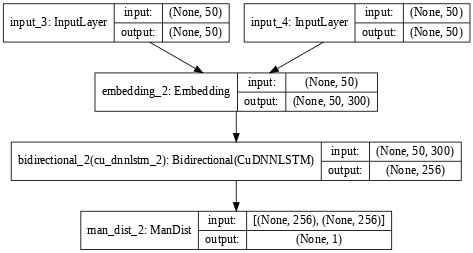

In [0]:
plot_model(model, show_shapes=True, dpi=60)

In [0]:
# trainig model
from keras.callbacks import ModelCheckpoint
# from tensorboardcolab import *
# tbc = TensorBoardColab()

filepath = "Add-saved-model-{epoch:02d}-{val_acc:.2f}.hdf5"
cp_call = ModelCheckpoint(filepath, verbose=1, period=1)


In [0]:
model_hist = model.fit([train_sent_1, train_sent_2], y_train, epochs=30, batch_size=256, validation_data=([val_sent_1, val_sent_2], y_val), callbacks=[cp_call])

Train on 41157 samples, validate on 4573 samples
Epoch 1/30
41157/41157 [==============================] - 15s 358us/step - loss: 0.0037 - acc: 0.9961 - mean_absolute_error: 0.0174 - val_loss: 0.0015 - val_acc: 0.9983 - val_mean_absolute_error: 0.0080

Epoch 00001: saving model to Add-saved-model-01-1.00.hdf5
Epoch 2/30
41157/41157 [==============================] - 14s 339us/step - loss: 0.0010 - acc: 0.9990 - mean_absolute_error: 0.0065 - val_loss: 0.0010 - val_acc: 0.9993 - val_mean_absolute_error: 0.0071

Epoch 00002: saving model to Add-saved-model-02-1.00.hdf5
Epoch 3/30
41157/41157 [==============================] - 14s 336us/step - loss: 7.8685e-04 - acc: 0.9992 - mean_absolute_error: 0.0053 - val_loss: 0.0010 - val_acc: 0.9989 - val_mean_absolute_error: 0.0058

Epoch 00003: saving model to Add-saved-model-03-1.00.hdf5
Epoch 4/30
41157/41157 [==============================] - 14s 336us/step - loss: 7.1102e-04 - acc: 0.9994 - mean_absolute_error: 0.0053 - val_loss: 8.9938e-04 - 

In [0]:
model_result = model_hist.history

In [0]:
# Save to driver
!cp /content/Add-saved-model-30-1.00.hdf5 /content/drive/'My Drive'/'Colab Notebooks'/'0.Projects'/'Text Similarity'/model_result.hdf5 

In [0]:
# new_model_path = '/content/drive/My Drive/Colab Notebooks/0.Projects/Text Similarity/model_result.hdf5'

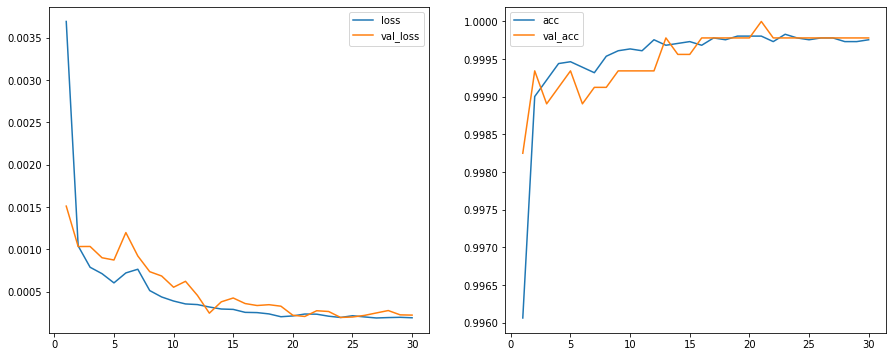

In [0]:
plt.figure(figsize=(15,6))
epochs = np.arange(1, 31)
plt.subplot(1,2,1)
plt.plot(epochs, model_result['loss'], label = 'loss')
plt.plot(epochs, model_result['val_loss'], label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_result['acc'], label='acc')
plt.plot(epochs, model_result['val_acc'], label='val_acc')
plt.legend()

In [0]:
# train['sentence_1'][5025]

In [0]:
# test_sent = [train['sentence_1'][5025]]

In [0]:
# test_sent

In [0]:
# test_sent_token = tokenizer.texts_to_sequences(test_sent)

In [0]:
# test_sent_token

In [0]:
# test_sent_pad = sequence.pad_sequences(test_sent_token, maxlen=1000, padding='post', )

In [0]:
# train['sentence_1']

In [0]:
# prediction function

# def prediction_result(query_indx, compare_indx):
#   test_sent = [train['sentence_1'][query_indx]]
#   test_sent_token = tokenizer.texts_to_sequences(test_sent)
#   test_sent_pad = sequence.pad_sequences(test_sent_token, maxlen=50, padding='post')

#   compare_sent = [train['sentence_2'][compare_indx]]
#   compare_sent_tok = tokenizer.texts_to_sequences(compare_sent)
#   compare_sent_pad = sequence.pad_sequences(compare_sent_tok, maxlen=50, padding='post')

#   print('Query : ', ' '.join(train['sentence_1'][query_indx]))
#   print('Comparison: ', ' '.join(train['sentence_2'][compare_indx]))
#   result = model.predict([[test_sent_pad.reshape(-1,)], [compare_sent_pad.reshape(-1,)]])
#   print('Similarity - Query : Comparison')
#   print("%.2f" % result)

## 학습 데이터 구성

------------------------
임대료 저속 싱글   =  운반비 저속 싱글

임대료 저속 싱글  $\neq$ 임대료 대용량 저속 싱글

------------------------
## 저속 싱글이 같으면 임대료, 설치비, 해체비, 운반비, 충표시에 대한 항목이 같은 것 으로 학습
## 그러나 저속싱글 대용량은 저속싱글과 다름

In [0]:
prediction_result(6447, 6448)

Query :  임대료 저속 싱글 ( 1 . 0 ton ) 월
Comparison:  운반비 저속 싱글 ( 1 . 0 ton ) 대
Similarity - Query : Comparison
0.95


In [0]:
prediction_result(6447, 10440)

Query :  임대료 저속 싱글 ( 1 . 0 ton ) 월
Comparison:  임대료 저속 싱글 대용량 ( 1 . 5 ton ) 월
Similarity - Query : Comparison
0.01


In [0]:
prediction_result(39179, 39189)

Query :  철근 콘크리트 용 봉강 HD 16 TON
Comparison:  TVS - 350 2000 * 2002 M 2
Similarity - Query : Comparison
0.00


In [0]:
prediction_result(6447, 10440)

Query :  임대료 저속 싱글 ( 1 . 0 ton ) 월
Comparison:  임대료 저속 싱글 대용량 ( 1 . 5 ton ) 월
Similarity - Query : Comparison
0.01


In [0]:
prediction_result(41233, 41239)

Query :  철근 콘크리트 타 설 / 펌프 카 ( 실적 ) 슬럼프 15 cm ( 100 m 3 이상 ) m 3
Comparison:  콘크리트 타 설 ( 펌프 카 ) ( 철근 15 M 이상 VIB 포함 ) m 2
Similarity - Query : Comparison
0.98


In [0]:
test_query = '철근 콘크리트 슬럼프'

In [0]:
test_1 = mecab_morph(test_query)
test_1 = tokenizer.texts_to_sequences([test_1])
test_1 = sequence.pad_sequences(test_1, maxlen=50, padding='post')
test_1

array([[ 57,  21, 516,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int32)

## 모델 결과 및 유사도 확인

In [0]:
def prediction_result(query_indx, compare_indx):
  if query_indx == float:   
    test_sent = [train['sentence_1'][query_indx]]
    test_sent_token = tokenizer.texts_to_sequences(test_sent)
    test_sent_pad = sequence.pad_sequences(test_sent_token, maxlen=50, padding='post')

    # compare with DB SET
    compare_sent = [train['sentence_2'][compare_indx]]
    compare_sent_tok = tokenizer.texts_to_sequences(compare_sent)
    compare_sent_pad = sequence.pad_sequences(compare_sent_tok, maxlen=50, padding='post')

    print('요청 항목 : ')
    print(' '.join(train['sentence_1'][query_indx]))
    print('\n')
    print('DB 비교 항목: ')
    print(' '.join(train['sentence_2'][compare_indx]))
    result = model.predict([[test_sent_pad.reshape(-1,)], [compare_sent_pad.reshape(-1,)]])
    print('\n')
    print('유사도------- 요청항목 : 비교항목 결과 (%)')
    print(float("%.5f" % result)*100, '%')
  
  else :
    test_sent = mecab_morph(query_indx)
    test_sent_token = tokenizer.texts_to_sequences([test_sent])
    test_sent_pad = sequence.pad_sequences(test_sent_token, maxlen=50, padding='post')

    # compare with DB SET
    compare_sent = [train['sentence_2'][compare_indx]]
    compare_sent_tok = tokenizer.texts_to_sequences(compare_sent)
    compare_sent_pad = sequence.pad_sequences(compare_sent_tok, maxlen=50, padding='post')

    print('요청 항목 : ')
    print(query_indx)
    print('\n')
    print('DB 비교 항목: ')
    print(' '.join(train['sentence_2'][compare_indx]))
    result = model.predict([[test_sent_pad.reshape(-1,)], [compare_sent_pad.reshape(-1,)]])
    print('\n')
    print('유사도------- 요청항목 : 비교항목 결과 (%)')
    print(float("%.5f" % result)*100, '%')

In [0]:
word_indx['h']

54

In [0]:
prediction_result('어스앵커공 천공 토사 대규모', 41256)

요청 항목 : 
어스앵커공 천공 토사 대규모


DB 비교 항목: 
H - PILE 박기 천 공 토사 대 규모 ( 실적 ) M


유사도------- 요청항목 : 비교항목 결과 (%)
2.443 %


In [0]:
prediction_result('터파기 ', 41201)

요청 항목 : 
터파기 


DB 비교 항목: 
터파 기 백호 0 . 4 M 3 ( 100 %) M 3


유사도------- 요청항목 : 비교항목 결과 (%)
55.789 %


In [0]:
prediction_result('터파기', 41219)

요청 항목 : 
터파기


DB 비교 항목: 
터파 기 백호 0 . 4 M 3 ( 100 %) M 3


유사도------- 요청항목 : 비교항목 결과 (%)
55.789 %


In [0]:
prediction_result('터파기 토사 백호 0.4m3 ', 41204)

요청 항목 : 
터파기 토사 백호 0.4m3 


DB 비교 항목: 
터파 기 : 토사 ( 육상 ) 백호 0 . 4 M 3 M 3


유사도------- 요청항목 : 비교항목 결과 (%)
89.1 %


In [0]:
prediction_result('콘크리트타설 철근 콘크리트아설 슬럼프', 41239)

요청 항목 : 
콘크리트타설 철근 콘크리트아설 슬럼프


DB 비교 항목: 
콘크리트 타 설 ( 펌프 카 ) ( 철근 15 M 이상 VIB 포함 ) m 2


유사도------- 요청항목 : 비교항목 결과 (%)
80.456 %


In [0]:
prediction_result('콘크리트 타설 펌프카 철근 20m 이상', 41239)

요청 항목 : 
콘크리트 타설 펌프카 철근 20m 이상


DB 비교 항목: 
콘크리트 타 설 ( 펌프 카 ) ( 철근 15 M 이상 VIB 포함 ) m 2


유사도------- 요청항목 : 비교항목 결과 (%)
79.132 %


In [0]:
%%time
prediction_result('어스앵커공 천공 토사 ', 41255)


요청 항목 : 
어스앵커공 천공 토사 


DB 비교 항목: 
어스 앵커 공 천 공 토사 대 규모 ( 실적 )


유사도------- 요청항목 : 비교항목 결과 (%)
71.247 %
CPU times: user 11.1 ms, sys: 3.02 ms, total: 14.1 ms
Wall time: 16 ms


## Demo Related Resources

In [0]:
# embedding weights
model.layers[2].get_weights()

[array([[ 4.4194050e-02,  4.3808933e-02, -1.2970489e-02, ...,
         -1.3338481e-02, -3.8522478e-02, -6.5712243e-02],
        [ 6.8690181e-03,  4.6759401e-02, -4.3477882e-02, ...,
         -1.3853647e-02,  3.0576978e-02, -4.3010380e-02],
        [-3.3503301e-02,  5.3037383e-02,  5.2569594e-02, ...,
          5.5240829e-02, -8.1189331e-03, -4.9093845e-03],
        ...,
        [ 2.1352369e-02,  2.8088547e-02, -2.9965084e-02, ...,
          3.6834311e-03,  4.5979045e-02, -2.8584572e-03],
        [ 3.0061046e-02,  3.6172771e-03,  4.8498761e-02, ...,
         -1.6469395e-02, -2.6201958e-02, -1.9172544e-02],
        [ 8.8242693e-03,  3.1433903e-02,  7.2786861e-06, ...,
          1.6848471e-02, -1.5777193e-02, -4.0673837e-02]], dtype=float32)]

In [0]:
model.layers[2].get_weights()[0].shape

(1257, 300)

In [0]:
pd.DataFrame(model.layers[2].get_weights()[0].transpose()).to_excel('embedding_weights.xlsx')

In [0]:
with open('token.txt', 'w')as f:
  for k,v in tokenizer.index_word.items():
    f.write(v+'\n')

In [0]:
pd.read_csv('/content/token.txt', sep='\s').to_excel('token.xlsx')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [0]:
word_group = pd.DataFrame(tokenizer.index_word.items())

In [0]:
word_group.set_index(0).to_excel('word_group.xlsx')

In [0]:
gen_model.wv.vocab

{'가설사무실': <gensim.models.keyedvectors.Vocab at 0x7f110a71d518>,
 '발주처': <gensim.models.keyedvectors.Vocab at 0x7f1103d06cc0>,
 '감리사무실': <gensim.models.keyedvectors.Vocab at 0x7f110b800208>,
 '현장사무실': <gensim.models.keyedvectors.Vocab at 0x7f110b800160>,
 '화장실': <gensim.models.keyedvectors.Vocab at 0x7f110b800668>,
 '등': <gensim.models.keyedvectors.Vocab at 0x7f110b8003c8>,
 '식': <gensim.models.keyedvectors.Vocab at 0x7f110b800400>,
 '가설경비실': <gensim.models.keyedvectors.Vocab at 0x7f110b800470>,
 '2': <gensim.models.keyedvectors.Vocab at 0x7f110b800198>,
 '4': <gensim.models.keyedvectors.Vocab at 0x7f110b800320>,
 '기준': <gensim.models.keyedvectors.Vocab at 0x7f110b800518>,
 '월': <gensim.models.keyedvectors.Vocab at 0x7f110b8008d0>,
 '스틸방음벽': <gensim.models.keyedvectors.Vocab at 0x7f110b8002b0>,
 '자주식': <gensim.models.keyedvectors.Vocab at 0x7f110b800630>,
 'm2': <gensim.models.keyedvectors.Vocab at 0x7f110b8005f8>,
 '투명방음벽': <gensim.models.keyedvectors.Vocab at 0x7f110b800710>,
 '자립식': 

-------------------------------
## Embedding Projection

In [0]:
gen_model.wv.save_word2vec_format('test_gen_model.txt', binary=False, )

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
test_gen = pd.read_csv('test_gen_model.txt', sep='\s', header=None, skiprows=1, index_col=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [0]:
test_gen.shape

(1460, 300)

In [0]:
test_gen.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.322116,0.091768,0.092543,0.145906,-0.382159,0.031373,0.315243,0.100325,0.665733,-0.255382,0.317413,0.369848,-0.355850,0.357927,-0.157040,-0.294470,-0.057938,0.327090,-0.130035,0.210393,0.282956,-0.246516,0.179880,-0.035133,0.206022,-0.074622,-0.125958,-0.109911,0.024214,0.039650,-0.228810,0.092399,0.084347,-0.512480,0.127617,-0.552066,-0.371419,0.577327,0.226621,-0.442114,...,-0.170738,-0.544001,-0.067305,-0.230962,0.150760,-0.529380,0.053891,0.155737,0.292264,-0.211025,0.228133,0.098201,-0.361191,-0.107533,-0.075770,-0.471730,0.233283,0.635528,-0.009388,-0.035239,-0.063717,-0.066082,-0.071250,-0.219463,-0.305832,-0.491876,0.225481,0.097932,0.370565,0.270584,0.469623,0.036206,-2.263069,-0.042448,0.271847,0.484587,0.055682,-0.265676,-0.028650,0.251344
ea,-0.185024,-0.022713,-0.305167,-0.289353,-0.248787,-0.167485,0.249388,-0.081680,0.706169,-0.200481,0.005798,0.097362,-0.274122,-0.107193,0.084567,-0.499610,0.330919,0.053258,-0.554781,0.258735,0.744905,-0.015866,0.030689,0.683862,0.059033,-0.199876,-0.176314,0.148154,0.243347,0.642053,0.046395,-0.285608,0.289951,0.158331,0.222889,-0.265080,0.090474,0.399269,0.453973,0.184937,...,0.090738,-0.268368,-0.262852,0.232663,0.189244,-0.374161,0.622000,0.565830,0.226722,-0.157448,0.192160,0.008610,0.003916,-0.476926,-0.506056,0.336614,0.323186,0.759890,-0.178008,-0.014494,0.088409,0.601163,-0.622082,0.367344,0.233810,0.066138,0.267986,0.396087,0.001352,0.073697,0.250053,0.247882,-0.191071,0.614269,0.119363,0.089574,-0.022305,-0.123858,-0.192158,0.211576
x,-0.478953,0.118502,0.199591,0.240284,0.117450,-0.042868,0.129719,0.458448,0.339863,-0.153368,0.293150,0.251065,-0.465040,0.154262,-0.310054,0.099788,-0.033375,-0.347593,-0.147814,-0.066680,0.504174,-0.325257,0.149454,0.029670,0.225210,0.217406,-0.065369,-0.069704,-0.165861,0.197132,-0.330006,0.168099,0.366178,-0.234358,0.052461,-0.269975,-0.527530,0.183431,0.197626,-0.346170,...,0.033972,-0.315979,0.256271,0.011936,0.153179,-0.214002,0.019294,-0.015867,0.690745,-0.456314,-0.087545,0.075238,-0.447558,-0.183754,-0.430983,-0.345389,0.502223,0.425563,0.214674,-0.096493,-0.231897,-0.082509,0.058649,0.280645,-0.324380,-0.292413,-0.017401,-0.337764,0.145788,0.333916,0.096758,-0.331286,-0.692481,-0.146523,-0.229776,0.158977,-0.150910,-0.097723,0.147735,-0.289037
m2,-0.130051,0.046384,-0.072929,-0.362417,-0.325227,-0.333295,0.098427,0.083965,0.468237,0.057378,0.048206,0.026182,-0.108969,0.192598,0.248309,0.221634,0.535872,-0.092991,-0.183116,-0.126724,0.626768,0.223589,-0.031562,0.460325,-0.258391,-0.182425,-0.002641,0.097329,0.281616,0.561109,0.209926,-0.415923,0.057737,0.197647,0.230899,-0.291066,-0.041355,0.119554,0.072632,-0.206675,...,0.097425,-0.094523,0.264799,0.233367,0.405315,-0.602377,0.224257,0.341486,-0.029709,-0.025712,0.149693,-0.391162,0.245748,-0.442626,-0.677896,0.588022,0.176494,0.766380,0.347421,0.127501,-0.112734,0.349431,-0.332531,0.594193,0.287898,0.019220,0.000426,0.002598,-0.105350,-0.109554,0.553299,0.453609,-0.703998,0.555260,0.347628,-0.218664,-0.107950,0.040516,-0.162385,0.174835
160,-0.359632,-0.045037,-0.044615,0.406626,-0.446944,-0.173609,0.062452,0.565592,0.528632,-0.296816,0.409034,0.353443,-0.345091,0.322172,0.062464,-0.385588,0.123445,0.322776,-0.333051,0.014560,0.546922,-0.208987,0.060066,0.100387,0.270623,-0.137079,-0.029529,0.128824,0.110409,0.441198,-0.354222,0.386762,0.302671,-0.259735,0.224912,-0.472390,-0.540059,0.323865,0.086289,-0.591239,...,0.155282,-0.523249,0.212189,-0.327148,0.346802,-0.225754,0.414892,0.282001,0.649897,-0.704641,0.268816,0.063693,-0.477540,-0.214078,-0.475012,-0.244673,0.568294,0.631353,0.026499,0.071954,-0.126464,0.104230,

In [0]:
from sklearn.decomposition import PCA

In [0]:
gen_pca = PCA(n_components=3, random_state=1228)

In [0]:
gen_pca_result = gen_pca.fit_transform(test_gen)

In [0]:
gen_pca_df = pd.DataFrame(gen_pca_result)

In [0]:
tt_gen = test_gen.copy()

In [0]:
tt_gen = tt_gen.reset_index()

In [0]:
tt_gen[tt_gen[0] == '흙깎기']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
590,흙깎기,-0.116708,-0.103005,-0.040584,0.012581,-0.029779,-0.247184,0.157784,-0.166164,-0.014459,-0.012005,-0.054054,0.109937,-0.01176,-0.02469,0.02915,0.008569,-0.03521,0.100628,0.049258,0.064001,0.065265,-0.120311,-0.009545,-0.219267,-0.087493,0.014517,-0.066343,0.053991,0.167547,-0.024248,0.075839,-0.049653,0.200885,-0.01055,0.21358,0.028627,-0.022988,-0.008831,0.261609,...,0.011633,-0.233548,0.186146,-0.102268,0.010984,-0.122297,-0.066155,-0.009849,0.064947,-0.197818,0.053947,0.008064,-0.119859,-0.31572,-0.047174,0.003971,0.05521,0.120045,0.015205,0.150282,0.032668,-0.061003,-0.070824,0.121861,0.051105,-0.149797,0.051084,0.032855,0.162633,0.103169,0.296594,0.055092,-0.010674,0.121819,0.187648,0.003368,0.063711,-0.131052,-0.179376,-0.000212


## Gensim 3d Projection

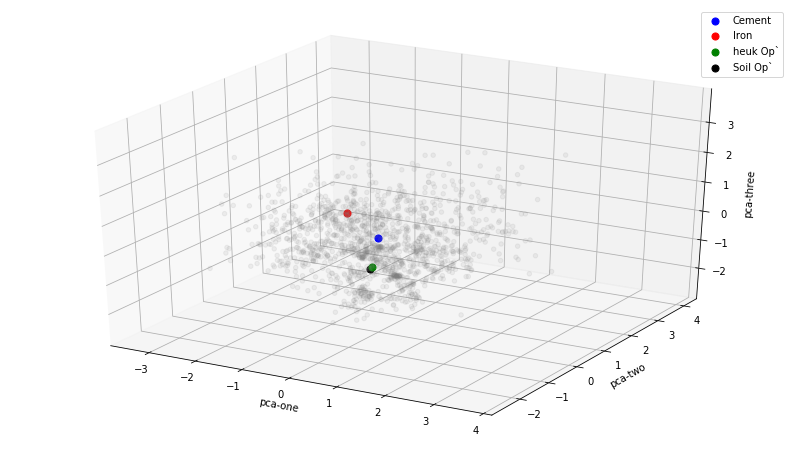

In [0]:
# PCA 결과에서 흙, 땅깎기, 시멘트, 철근의 임베딩 값을 3차원으로 투영(Projection)

ax = plt.figure(figsize=(14,8)).gca(projection='3d')
ax.scatter(
    xs=gen_pca_df.loc[:,0], 
    ys=gen_pca_df.loc[:,1], 
    zs=gen_pca_df.loc[:,2],  
    alpha = 0.1, c= 'gray'
)
ax.scatter(
    xs = gen_pca_df.iloc[170, 0],
    ys = gen_pca_df.iloc[170, 1],
    zs = gen_pca_df.iloc[170,2],
    c = 'b', s=50, label = 'Cement')  # -- 시멘트

ax.scatter(
    xs = gen_pca_df.iloc[220, 0],
    ys = gen_pca_df.iloc[220, 1],
    zs = gen_pca_df.iloc[220,2],
    c = 'r', s=50, label = 'Iron')  # -- 철근

ax.scatter(
    xs = gen_pca_df.iloc[590, 0],
    ys = gen_pca_df.iloc[590, 1],
    zs= gen_pca_df.iloc[590,2],
    c = 'g', s=50, label = 'heuk Op`')  # -- 흙깎기

ax.scatter(
    xs = gen_pca_df.iloc[53, 0],
    ys = gen_pca_df.iloc[53, 1],
    zs = gen_pca_df.iloc[53,2],
    c = 'black', s=50, label = 'Soil Op`')  # --땅깎기
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.legend()
plt.show()

In [0]:
pca = PCA(n_components=3, random_state=1228)

In [0]:
emb_pca = pca.fit_transform(embedding)

In [0]:
df_pca = pd.DataFrame(emb_pca)

In [0]:
df_pca.shape

(1257, 3)

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
df_pca.head()

,0,1,2
0,-0.232849,-0.169444,-0.035032
1,-0.240777,0.001300,0.008474
2,-0.656677,-0.299323,0.205194
3,-0.476348,-0.077792,0.135327
4,-0.473170,-0.153353,0.175314


In [0]:
df_pca.to_pickle('df_pca.pickle')

In [0]:
df_pca2 = pd.read_pickle('/content/df_pca.pickle')

In [0]:
df_pca.head()

,0,1,2
0,-0.232849,-0.169444,-0.035032
1,-0.240777,0.001300,0.008474
2,-0.656677,-0.299323,0.205194
3,-0.476348,-0.077792,0.135327
4,-0.473170,-0.153353,0.175314


In [0]:
df_pca.shape

(1257, 3)

## Korean Font Install

In [0]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/trutype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [0]:
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

## Embedding Projection

In [0]:
# df_pca = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/0.Projects/Text Similarity/KCC /df_pca.pickle')

In [0]:
word_indx

In [0]:
word_indx['토사']

41

In [0]:
# # PCA 결과에서 흙, 땅깎기, 시멘트, 철근의 임베딩 값을 3차원으로 투영(Projection)

# ax = plt.figure(figsize=(14,8)).gca(projection='3d')
# ax.scatter(
#     xs=df_pca.loc[:,0], 
#     ys=df_pca.loc[:,1], 
#     zs=df_pca.loc[:,2],  
#     alpha = 0.1, c= 'gray'
# )
# ax.scatter(
#     xs = df_pca.loc[235, 0],
#     ys = df_pca.loc[235, 1],
#     zs= df_pca.loc[235,2],
#     c = 'b', s=50, label = 'Cement')  # -- 시멘트

# ax.scatter(
#     xs = df_pca.loc[64, 0],
#     ys = df_pca.loc[64, 1],
#     zs= df_pca.loc[64,2],
#     c = 'r', s=50, label = 'Iron')  # -- 철근

# ax.scatter(
#     xs = df_pca.loc[520, 0],
#     ys = df_pca.loc[520, 1],
#     zs= df_pca.loc[520,2],
#     c = 'g', s=50, label = 'Soil')  # -- 흙

# ax.scatter(
#     xs = df_pca.loc[40, 0],
#     ys = df_pca.loc[40, 1],
#     zs= df_pca.loc[40,2],
#     c = 'black', s=30, label = 'Soil Op`')  # --땅깎기
# ax.set_xlabel('pca-one')
# ax.set_ylabel('pca-two')
# ax.set_zlabel('pca-three')
# ax.legend()
# plt.show()

-------------------------------
-------------------------------

## Demo Related

# Tokenizer

In [0]:
tokenizer.index_word

{1: 'UNK',
 2: '.',
 3: '2',
 4: '1',
 5: 'm',
 6: '(',
 7: ')',
 8: 'ea',
 9: 'x',
 10: '=',
 11: 'aw',
 12: '0',
 13: '160',
 14: 'ton',
 15: '8',
 16: '*',
 17: '7',
 18: '3',
 19: '456',
 20: '+',
 21: 't',
 22: '콘크리트',
 23: '5',
 24: 'mm',
 25: '기',
 26: '저속',
 27: '회',
 28: '-',
 29: '싱글',
 30: '12',
 31: '페인트',
 32: '식',
 33: '공',
 34: '290',
 35: '390',
 36: '4',
 37: '모르타르',
 38: '대',
 39: '바탕',
 40: '비',
 41: '토사',
 42: '면',
 43: '만들',
 44: '칠',
 45: '설치',
 46: '6',
 47: '·',
 48: '롤러',
 49: '/',
 50: '천',
 51: '용',
 52: '실적',
 53: '규모',
 54: 'h',
 55: 'a',
 56: '수성',
 57: '요금',
 58: '대용량',
 59: '월',
 60: '해체',
 61: '하수도',
 62: 'c',
 63: '100',
 64: 'd',
 65: '철근',
 66: '층',
 67: '200',
 68: '10',
 69: '벽',
 70: '바닥',
 71: '내부',
 72: '가설',
 73: '800',
 74: 'b',
 75: '[',
 76: ']',
 77: '상',
 78: '사무실',
 79: '앵커',
 80: 'pile',
 81: '친환경',
 82: '300',
 83: '150',
 84: '박기',
 85: '어스',
 86: '운반비',
 87: '임대료',
 88: '및',
 89: '단열',
 90: '표시',
 91: '15',
 92: '방음벽',
 93: '자',
 94: 

In [0]:
len(tokenizer.word_index)

1256

In [0]:
gen_model.wv.save_word2vec_format('test_gen_model.txt', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
test_gen = pd.read_csv('test_gen_model.txt', sep='\s', header=None, skiprows=1, index_col=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [0]:
from sklearn.decomposition import PCA

In [0]:
gen_pca = PCA(n_components=3, random_state=1228)

In [0]:
gen_pca_result = gen_pca.fit_transform(test_gen)

In [0]:
gen_pca_df = pd.DataFrame(gen_pca_result)

In [0]:
tt_gen = test_gen.copy()

In [0]:
tt_gen = tt_gen.reset_index()

In [0]:
tt_gen[tt_gen[0] == '흙깎기']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
590,흙깎기,-0.116708,-0.103005,-0.040584,0.012581,-0.029779,-0.247184,0.157784,-0.166164,-0.014459,-0.012005,-0.054054,0.109937,-0.01176,-0.02469,0.02915,0.008569,-0.03521,0.100628,0.049258,0.064001,0.065265,-0.120311,-0.009545,-0.219267,-0.087493,0.014517,-0.066343,0.053991,0.167547,-0.024248,0.075839,-0.049653,0.200885,-0.01055,0.21358,0.028627,-0.022988,-0.008831,0.261609,...,0.011633,-0.233548,0.186146,-0.102268,0.010984,-0.122297,-0.066155,-0.009849,0.064947,-0.197818,0.053947,0.008064,-0.119859,-0.31572,-0.047174,0.003971,0.05521,0.120045,0.015205,0.150282,0.032668,-0.061003,-0.070824,0.121861,0.051105,-0.149797,0.051084,0.032855,0.162633,0.103169,0.296594,0.055092,-0.010674,0.121819,0.187648,0.003368,0.063711,-0.131052,-0.179376,-0.000212


# Embedding Projector


In [0]:
# PCA 결과에서 흙, 땅깎기, 시멘트, 철근의 임베딩 값을 3차원으로 투영(Projection)

ax = plt.figure(figsize=(14,8)).gca(projection='3d')
ax.scatter(
    xs=gen_pca_df.loc[:,0], 
    ys=gen_pca_df.loc[:,1], 
    zs=gen_pca_df.loc[:,2],  
    alpha = 0.1, c= 'gray'
)
ax.scatter(
    xs = gen_pca_df.iloc[170, 0],
    ys = gen_pca_df.iloc[170, 1],
    zs = gen_pca_df.iloc[170,2],
    c = 'b', s=50, label = 'Cement')  # -- 시멘트

ax.scatter(
    xs = gen_pca_df.iloc[220, 0],
    ys = gen_pca_df.iloc[220, 1],
    zs = gen_pca_df.iloc[220,2],
    c = 'r', s=50, label = 'Iron')  # -- 철근

ax.scatter(
    xs = gen_pca_df.iloc[590, 0],
    ys = gen_pca_df.iloc[590, 1],
    zs= gen_pca_df.iloc[590,2],
    c = 'g', s=50, label = 'heuk Op`')  # -- 흙깎기

ax.scatter(
    xs = gen_pca_df.iloc[53, 0],
    ys = gen_pca_df.iloc[53, 1],
    zs = gen_pca_df.iloc[53,2],
    c = 'black', s=50, label = 'Soil Op`')  # --땅깎기
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.legend()
plt.show()

## Tensor Board  - Embedding Projector

In [0]:
# ! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# ! unzip ngrok-stable-linux-amd64.zip

In [0]:
tt_tb = tt_gen.drop(0, axis=1)

In [0]:
tt_tb = tt_tb.values

In [0]:
import tensorflow as tf

In [0]:
emb = tf.Variable(tt_tb, name='word_embeddings')

init_op = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
save_path = saver.save(sess, "gen_model/gen_model.ckpt")
print("model saved in paht : %s" %save_path)

model saved in paht : gen_model/gen_model.ckpt


In [0]:
from tensorflow.contrib.tensorboard.plugins import projector

In [0]:
import os
words = '\n'.join(list(tt_gen[0].values))
with open (os.path.join('gen_model', 'metadata.tsv'), 'w') as f:
  f.write(words)

In [0]:
LOG_DIR = 'logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)


emb = tf.Variable(tt_tb, name='word_embeddings')
init_op = tf.global_variables_initializer()

sess = tf.Session()
saver = tf.train.Saver([emb])
sess.run(init_op)
save_path = saver.save(sess, "gen_model/gen_model.ckpt")
print("model saved in paht : %s" %save_path)

config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = emb.name

embedding.metadata_path = '/content/gen_model/metadata.tsv'
projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)

model saved in paht : gen_model/gen_model.ckpt


In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://f2be368b.ngrok.io


In [0]:
tt_gen[tt_gen[0]=='땅깎기']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
53,땅깎기,-0.133784,-0.10761,-0.023608,0.009478,-0.030258,-0.245454,0.158482,-0.165724,-0.001282,-0.02465,-0.044583,0.109351,-0.006859,-0.020357,0.02409,0.01068,-0.022444,0.101647,0.056725,0.070504,0.066723,-0.128316,-0.009693,-0.209161,-0.088204,0.02399,-0.065298,0.076263,0.161735,-0.017907,0.073247,-0.048209,0.220055,-0.026645,0.204373,0.023007,-0.057699,-0.009066,0.284292,...,0.013459,-0.242171,0.206242,-0.114016,0.005697,-0.123752,-0.045067,-0.015259,0.062705,-0.179514,0.061632,0.001346,-0.125992,-0.317673,-0.063688,-0.012062,0.059712,0.133619,0.004603,0.144299,0.022126,-0.067188,-0.078863,0.104005,0.029179,-0.15447,0.048107,0.045228,0.171928,0.086377,0.287186,0.053056,0.048544,0.109486,0.202764,-0.003476,0.061188,-0.134643,-0.181926,0.018638


In [0]:
tt_gen[tt_gen[0]=='흙깎기']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
590,흙깎기,-0.116708,-0.103005,-0.040584,0.012581,-0.029779,-0.247184,0.157784,-0.166164,-0.014459,-0.012005,-0.054054,0.109937,-0.01176,-0.02469,0.02915,0.008569,-0.03521,0.100628,0.049258,0.064001,0.065265,-0.120311,-0.009545,-0.219267,-0.087493,0.014517,-0.066343,0.053991,0.167547,-0.024248,0.075839,-0.049653,0.200885,-0.01055,0.21358,0.028627,-0.022988,-0.008831,0.261609,...,0.011633,-0.233548,0.186146,-0.102268,0.010984,-0.122297,-0.066155,-0.009849,0.064947,-0.197818,0.053947,0.008064,-0.119859,-0.31572,-0.047174,0.003971,0.05521,0.120045,0.015205,0.150282,0.032668,-0.061003,-0.070824,0.121861,0.051105,-0.149797,0.051084,0.032855,0.162633,0.103169,0.296594,0.055092,-0.010674,0.121819,0.187648,0.003368,0.063711,-0.131052,-0.179376,-0.000212


In [0]:
tt_gen.iloc[93:94, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
93,공,-0.102126,-0.107866,-0.04162,0.00477,-0.036635,-0.237586,0.174106,-0.162506,-0.003842,-0.02792,-0.045078,0.114803,-0.003134,-0.005534,0.023864,0.012609,-0.021673,0.105869,0.05378,0.064329,0.073754,-0.12263,-0.004067,-0.211419,-0.084942,0.024455,-0.07146,0.066746,0.145787,-0.023553,0.081767,-0.06084,0.217641,-0.028898,0.22029,0.012416,-0.043872,-0.003646,0.260911,...,-0.004416,-0.239951,0.215616,-0.096056,0.019272,-0.135421,-0.057998,-0.016083,0.047534,-0.191781,0.058967,0.00115,-0.124767,-0.319542,-0.064295,-0.011995,0.075838,0.128954,0.017222,0.151107,0.029926,-0.064425,-0.078538,0.115749,0.048594,-0.145123,0.058126,0.038664,0.158273,0.088005,0.306665,0.047429,-0.002597,0.111855,0.190767,-0.008162,0.069643,-0.122742,-0.171849,0.007832


## Recommandation Result

In [0]:
p_candidates = pd.read_excel('/content/drive/My Drive/Colab Notebooks/0.Projects/Text Similarity/KCC /kcc_demo_prediction.xlsx')

In [0]:
p_candidates.fillna('', inplace=True)

In [0]:
p_candidates = p_candidates.astype('str')

In [0]:
p_candidates['concat'] = p_candidates['공증'] + ', ' + p_candidates['규격'] + ', ' + p_candidates['단위'] 

## 유사 내역 추천

In [0]:
query_1 = "흙깎기 토사깎기"

In [0]:
%%time

# Input the Query
query_test = query_1

test_sent = mecab_morph(query_test)
test_sent_token = tokenizer.texts_to_sequences([test_sent])
test_sent_pad = sequence.pad_sequences(test_sent_token, maxlen=50, padding='post')

sim_result = []
for i in p_candidates.loc[:, 'concat']:
  cand_sent = mecab_morph(str(i))
  cand_sent_token = tokenizer.texts_to_sequences([cand_sent])
  cand_sent_pad = sequence.pad_sequences(cand_sent_token, maxlen=50, padding='post')

  similarity = model.predict([test_sent_pad, cand_sent_pad])
  # print(similarity[0][0])
  sim_result.append(similarity[0][0])

p_candidates['similarity_result'] = sim_result

print('Query 요청 내역 : ', query_test)
print('\n')
print('유사 추천 내역 - (상위 5개)')
display(p_candidates.sort_values('similarity_result', ascending=False).drop_duplicates().head(5)[['공증', '규격', '단위', 'similarity_result']])

# Sorting only the results
query_result = p_candidates.sort_values('similarity_result', ascending=False).drop_duplicates().head(5)[['공증', '규격', '단위', 'similarity_result']]


# # Save to Json
# with open('df.json', 'w', encoding='utf-8') as file:
#   query_result.to_json(file, force_ascii=False)



Query 요청 내역 :  흙깎기 토사깎기


유사 추천 내역 - (상위 5개)


,공증,규격,단위,similarity_result
965,흙깎기 흙깍기공,"토사, 대규모(실적)",M3,0.695576
966,흙깎기 토사 기계절취 흙깎기공,,M3,0.688933
976,흙깎기 토사깎기,도쟈32TON,M3,0.654778
980,땅깎기 공 땅깎기(토사),신설(도쟈32ton),M3,0.618599
25,실런트 수축줄눈,20mm * 25mm,m,0.057138


CPU times: user 10.3 s, sys: 3.65 s, total: 13.9 s
Wall time: 12.7 s


In [0]:
query_2 = "어스 앵커 공 천공 토사 (대규모) 개소"

In [0]:
%%time

# Input the Query
query_test = query_2

test_sent = mecab_morph(query_test)
test_sent_token = tokenizer.texts_to_sequences([test_sent])
test_sent_pad = sequence.pad_sequences(test_sent_token, maxlen=50, padding='post')

sim_result = []
for i in p_candidates.loc[:, 'concat']:
  cand_sent = mecab_morph(str(i))
  cand_sent_token = tokenizer.texts_to_sequences([cand_sent])
  cand_sent_pad = sequence.pad_sequences(cand_sent_token, maxlen=50, padding='post')

  similarity = model.predict([test_sent_pad, cand_sent_pad])
  # print(similarity[0][0])
  sim_result.append(similarity[0][0])

p_candidates['similarity_result'] = sim_result

print('Query 요청 내역 : ', query_test)
print('\n')
print('유사 추천 내역 - (상위 5개)')
display(p_candidates.sort_values('similarity_result', ascending=False).drop_duplicates().head(5)[['공증', '규격', '단위', 'similarity_result']])

# Sorting only the results
query_result = p_candidates.sort_values('similarity_result', ascending=False).drop_duplicates().head(5)[['공증', '규격', '단위', 'similarity_result']]


# # Save to Json
# with open('df.json', 'w', encoding='utf-8') as file:
#   query_result.to_json(file, force_ascii=False)



Query 요청 내역 :  어스 앵커 공 천공 토사 (대규모) 개소


유사 추천 내역 - (상위 5개)


,공증,규격,단위,similarity_result
998,어스앵커공 천공,"토사, 대규모(실적)",,0.801950
997,H-PILE 박기 천공,"토사, 대규모(실적)",M,0.024790
157,투명방음벽(자립식),,M2,0.005138
156,투명방음벽(자주식),,M2,0.005124
669,"PILE 설치, 항타",,M,0.002510


CPU times: user 10.2 s, sys: 3.6 s, total: 13.8 s
Wall time: 12.6 s


In [0]:
query_3 = "철근 콘크리트 타설 다짐"

In [0]:
%%time

# Input the Query
query_test = query_3

test_sent = mecab_morph(query_test)
test_sent_token = tokenizer.texts_to_sequences([test_sent])
test_sent_pad = sequence.pad_sequences(test_sent_token, maxlen=50, padding='post')

sim_result = []
for i in p_candidates.loc[:, 'concat']:
  cand_sent = mecab_morph(str(i))
  cand_sent_token = tokenizer.texts_to_sequences([cand_sent])
  cand_sent_pad = sequence.pad_sequences(cand_sent_token, maxlen=50, padding='post')

  similarity = model.predict([test_sent_pad, cand_sent_pad])
  # print(similarity[0][0])
  sim_result.append(similarity[0][0])

p_candidates['similarity_result'] = sim_result

print('Query 요청 내역 : ', query_test)
print('\n')
print('유사 추천 내역 - (상위 5개)')
display(p_candidates.sort_values('similarity_result', ascending=False).drop_duplicates().head(5)[['공증', '규격', '단위', 'similarity_result']])

# Sorting only the results
query_result = p_candidates.sort_values('similarity_result', ascending=False).drop_duplicates().head(5)[['공증', '규격', '단위', 'similarity_result']]


# # Save to Json
# with open('df.json', 'w', encoding='utf-8') as file:
#   query_result.to_json(file, force_ascii=False)



Query 요청 내역 :  철근 콘크리트 타설 다짐


유사 추천 내역 - (상위 5개)


,공증,규격,단위,similarity_result
18,철근콘크리트타설,다짐포함,m2,0.919201
989,콘크리트타설(철근),레미콘,m2,0.902892
23,철근콘크리트타설,(철근 다짐포함),m2,0.900005
17,콘크리트타설,"철근,펌프카0~15M",m2,0.896563
991,철근콘크리트타설/펌프카(실적),슬럼프 15cm(100m3이상),m3,0.894573


CPU times: user 10.3 s, sys: 3.57 s, total: 13.9 s
Wall time: 12.7 s


## Send to JSON

In [0]:
with open('df.json', 'r') as f:
  print(f.read())

{"공증":{"961":"땅깎기 공 땅깎기(토사)","965":"흙깎기 흙깍기공 ","978":"흙깎기 토사 기계절취 흙깎기공","979":"흙깎기 토사깎기","812":"코너접기"},"규격":{"961":"신설(도쟈32ton)","965":"토사, 대규모(실적)","978":"","979":"도쟈32TON","812":""},"단위":{"961":"M3","965":"M3","978":"M3","979":"M3","812":"M2"},"similarity_result":{"961":0.7117279768,"965":0.7114781141,"978":0.6899030805,"979":0.6878867745,"812":0.1841720045}}


-----------------------

## Character Level Test

--------------------------------

In [0]:
from keras.preprocessing import text, sequence

In [0]:
tokenizer = text.Tokenizer(filters='', split=',', char_level=True, oov_token='UNK')

In [0]:
courpus_char = []
for i in courpus:
  for k in i:
    courpus_char.append(k.lower())

In [0]:
courpus_char = ''.join(courpus_char)

In [0]:
tokenizer.fit_on_texts(courpus_char)

In [0]:
tokenizer.index_word

{1: 'UNK',
 2: '0',
 3: '1',
 4: '.',
 5: '2',
 6: 'm',
 7: 'a',
 8: '6',
 9: '5',
 10: '(',
 11: ')',
 12: 'e',
 13: 't',
 14: '3',
 15: '4',
 16: '8',
 17: '트',
 18: '9',
 19: 'w',
 20: 'x',
 21: '=',
 22: '7',
 23: 'o',
 24: '기',
 25: '리',
 26: 'n',
 27: '대',
 28: '르',
 29: '수',
 30: '용',
 31: '사',
 32: '*',
 33: '인',
 34: '설',
 35: 'd',
 36: '모',
 37: '비',
 38: '공',
 39: '식',
 40: 's',
 41: '타',
 42: '+',
 43: '콘',
 44: '크',
 45: '바',
 46: '실',
 47: 'l',
 48: '저',
 49: '속',
 50: '페',
 51: '싱',
 52: '글',
 53: '회',
 54: '-',
 55: '면',
 56: 'h',
 57: '시',
 58: '천',
 59: '스',
 60: '벽',
 61: '도',
 62: 'c',
 63: '칠',
 64: '치',
 65: '장',
 66: '만',
 67: 'p',
 68: '탕',
 69: '토',
 70: '부',
 71: '판',
 72: '방',
 73: 'r',
 74: '들',
 75: '강',
 76: '경',
 77: '금',
 78: '지',
 79: '적',
 80: 'i',
 81: '하',
 82: '·',
 83: '러',
 84: '월',
 85: '롤',
 86: '일',
 87: '성',
 88: '상',
 89: '/',
 90: '량',
 91: '이',
 92: '반',
 93: '규',
 94: 'b',
 95: '요',
 96: '체',
 97: '화',
 98: '철',
 99: '레',
 100: '보',
 101: 

In [0]:
len(tokenizer.index_word)

475

In [0]:
indx_word = tokenizer.index_word

In [0]:
word_indx = {v:k for k, v in indx_word.items()}

In [0]:
train.head()

,sentence_1,sentence_2,is_similar
0,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식",1
1,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","가설경비실 (2.4*2.4 기준), , 월",1
2,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","이동식화장실(FRP), , EA",1
3,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","EGI펜스, , M2",0
4,"가설사무실, 발주처,감리사무실,현장사무실 ,화장실 등, 식","스틸방음벽(자주식), , M2",0


In [0]:
# train['sentence_1'] = train['sentence_1'].apply(mecab_morph)
# train['sentence_2'] = train['sentence_2'].apply(mecab_morph)

In [0]:
sent_1 = tokenizer.texts_to_sequences(train['sentence_1'])
sent_2 = tokenizer.texts_to_sequences(train['sentence_2'])
target = train['is_similar'].astype('float')

In [0]:
counter = []
for i in sent_2:
  lgt = len(i)
  counter.append(lgt)
print(np.max(np.array(counter)))

75


In [0]:
sent_1_train = sequence.pad_sequences(sent_1, maxlen=80, padding='post')
sent_2_train = sequence.pad_sequences(sent_2, maxlen=80, padding='post')

In [0]:
print(sent_1_train.shape)
sent_1_train

(45730, 80)


array([[110,  34,  31, ...,   0,   0,   0],
       [110,  34,  31, ...,   0,   0,   0],
       [110,  34,  31, ...,   0,   0,   0],
       ...,
       [124,  59, 130, ...,   0,   0,   0],
       [124,  59, 130, ...,   0,   0,   0],
       [124,  59, 130, ...,   0,   0,   0]], dtype=int32)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
full_numpy = np.concatenate([sent_1_train, sent_2_train], axis=1)

In [0]:
full_numpy.shape

(45730, 160)

In [0]:
reverse_concat = full_numpy[:, :80]

In [0]:
reverse_concat.shape

(45730, 80)

In [0]:
# check reverse
assert sent_1_train.all() == reverse_concat.all()

In [0]:
x_train, x_test, y_train, y_test = train_test_split(full_numpy, target, test_size=0.1, random_state=1228, stratify=target)

### Split train - sent_1, sent_2
### Split val - sent_1, sent_2

In [0]:
def revers_concat(x):
  sent_1 = x[:, :80]
  sent_2 = x[:, 80:]
  return sent_1, sent_2

In [0]:
train_sent_1, train_sent_2 = revers_concat(x_train)
val_sent_1, val_sent_2 = revers_concat(x_test)

In [0]:
y_train = y_train.values
y_val = y_test.values

In [0]:
from keras.layers import Layer
from keras import backend as K
class ManDist(Layer):
    """
    Keras Custom Layer that calculates Manhattan Distance.
    """

    # initialize the layer, No need to include inputs parameter!
    def __init__(self, **kwargs):
        self.result = None
        super(ManDist, self).__init__(**kwargs)

    # input_shape will automatic collect input shapes to build layer
    def build(self, input_shape):
        super(ManDist, self).build(input_shape)

    # This is where the layer's logic lives.
    def call(self, x, **kwargs):
        self.result = K.exp(-K.sum(K.abs(x[0] - x[1]), axis=1, keepdims=True))
        return self.result

    # return output shape
    def compute_output_shape(self, input_shape):
        return K.int_shape(self.result)

In [0]:
# create model 
from keras import models, layers

embedding = layers.Embedding(300, 475, input_length=80)
shared_lstm = layers.Bidirectional(layers.CuDNNLSTM(128))

input_1 = layers.Input(shape=(80,))
x_emb = embedding(input_1)
x = shared_lstm(x_emb)

input_2 = layers.Input(shape=(80,))
x2_emb = embedding(input_2)
x2 = shared_lstm(x2_emb)

sent_1_result = x
sent_2_result = x2
out = ManDist()([x, x2])


In [0]:
model = models.Model([input_1, input_2], out)

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc', 'mae'])

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 1215)     364500      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 256)          1377280     embedding_1[0][0]          

In [0]:
from keras.utils import plot_model

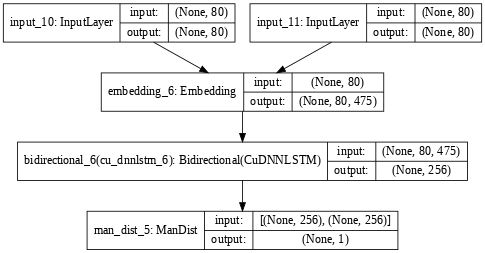

In [0]:
plot_model(model, show_shapes=True, dpi=60)

In [0]:
# trainig model
from keras.callbacks import ModelCheckpoint
from tensorboardcolab import *
tbc = TensorBoardColab()

filepath = "Char-saved-model-{epoch:02d}-{val_acc:.2f}.hdf5"
cp_call = ModelCheckpoint(filepath, verbose=1, period=1)


Wait for 8 seconds...
TensorBoard link:
https://0049760c.ngrok.io


In [0]:
model_hist = model.fit([train_sent_1, train_sent_2], y_train, epochs=30, batch_size=256, validation_data=([val_sent_1, val_sent_2], y_val), callbacks=[cp_call,TensorBoardColabCallback(tbc)])

Train on 41157 samples, validate on 4573 samples
Epoch 1/30
41157/41157 [==============================] - 26s 630us/step - loss: 0.0043 - acc: 0.9951 - mean_absolute_error: 0.0166 - val_loss: 0.0021 - val_acc: 0.9974 - val_mean_absolute_error: 0.0079

Epoch 00001: saving model to Char-saved-model-01-1.00.hdf5
Epoch 2/30
41157/41157 [==============================] - 25s 616us/step - loss: 0.0014 - acc: 0.9982 - mean_absolute_error: 0.0068 - val_loss: 0.0015 - val_acc: 0.9985 - val_mean_absolute_error: 0.0105

Epoch 00002: saving model to Char-saved-model-02-1.00.hdf5
Epoch 3/30
41157/41157 [==============================] - 26s 620us/step - loss: 0.0010 - acc: 0.9989 - mean_absolute_error: 0.0053 - val_loss: 0.0012 - val_acc: 0.9985 - val_mean_absolute_error: 0.0038

Epoch 00003: saving model to Char-saved-model-03-1.00.hdf5
Epoch 4/30
41157/41157 [==============================] - 26s 620us/step - loss: 7.2609e-04 - acc: 0.9994 - mean_absolute_error: 0.0041 - val_loss: 8.8181e-04 - v

In [0]:
model_result = model_hist.history

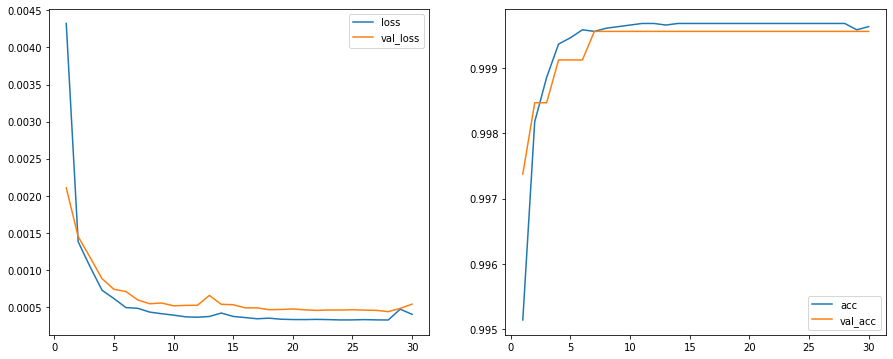

In [0]:
plt.figure(figsize=(15,6))
epochs = np.arange(1, 31)
plt.subplot(1,2,1)
plt.plot(epochs, model_result['loss'], label = 'loss')
plt.plot(epochs, model_result['val_loss'], label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model_result['acc'], label='acc')
plt.plot(epochs, model_result['val_acc'], label='val_acc')
plt.legend()

In [0]:
def prediction_result(query_indx, compare_indx):
 
  test_sent = [train['sentence_1'][query_indx]]
  test_sent_token = tokenizer.texts_to_sequences(test_sent)
  test_sent_pad = sequence.pad_sequences(test_sent_token, maxlen=80, padding='post')

  # compare with DB SET
  compare_sent = [train['sentence_2'][compare_indx]]
  compare_sent_tok = tokenizer.texts_to_sequences(compare_sent)
  compare_sent_pad = sequence.pad_sequences(compare_sent_tok, maxlen=80, padding='post')

  print('요청 항목 : ')
  print(' '.join(train['sentence_1'][query_indx]))
  print('\n')
  print('DB 비교 항목: ')
  print(' '.join(train['sentence_2'][compare_indx]))
  result = model.predict([[test_sent_pad.reshape(-1,)], [compare_sent_pad.reshape(-1,)]])
  print('\n')
  print('유사도------- 요청항목 : 비교항목 결과 (%)')
  print(float("%.5f" % result)*100, '%')
  
  # else :
  #   test_sent = mecab_morph(query_indx)
  #   test_sent_token = tokenizer.texts_to_sequences([test_sent])
  #   test_sent_pad = sequence.pad_sequences(test_sent_token, maxlen=80, padding='post')

  #   # compare with DB SET
  #   compare_sent = [train['sentence_2'][compare_indx]]
  #   compare_sent_tok = tokenizer.texts_to_sequences(compare_sent)
  #   compare_sent_pad = sequence.pad_sequences(compare_sent_tok, maxlen=80, padding='post')

  #   print('요청 항목 : ')
  #   print(query_indx)
  #   print('\n')
  #   print('DB 비교 항목: ')
  #   print(' '.join(train['sentence_2'][compare_indx]))
  #   result = model.predict([[test_sent_pad.reshape(-1,)], [compare_sent_pad.reshape(-1,)]])
  #   print('\n')
  #   print('유사도------- 요청항목 : 비교항목 결과 (%)')
  #   print(float("%.5f" % result)*100, '%')

In [0]:
prediction_result(41223, 41222)

요청 항목 : 
콘 크 리 트 타 설 ,   철 근 , 펌 프 카 0 ~ 1 5 M ,   m 2


DB 비교 항목: 
철 근   콘 크 리 트 ( H = 1 5 m 미 만 ) ,   슬 럼 프   1 5 c m ( 1 0 0 m 3 이 상 ) ,   m 2


유사도------- 요청항목 : 비교항목 결과 (%)
94.181 %
